In [ ]:
# Installing PySpark

! pip install -q pyspark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-209b4143-f44d-4083-8ca6-55d196b0e7f3/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Creating Spark Session and App

spark = SparkSession.builder.appName("CreditCardFraud").master("local").getOrCreate()
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [ ]:
# Reading CSV into Dataframe

data1 = spark.read.csv("dbfs:/FileStore/shared_uploads/manthansolanki812@gmail.com/IBM_1.csv", header=True, inferSchema=True)
data1.show(5)

+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day|               Time| Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|   0|   0|2002|    9|  1|2024-05-06 06:21:00|$134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|   null|       No|
|   0|   0|2002|    9|  1|2024-05-06 06:42:00| $38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|2024-05-06 06:22:00|$120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|2024-05-06 17:45:00|$128.95|Swipe Transaction|3414527459

In [ ]:
data2 = spark.read.csv("dbfs:/FileStore/shared_uploads/manthansolanki812@gmail.com/IBM_2.csv", header=True, inferSchema=True)
data2.show(5)

+----+----+----+-----+---+-------------------+-------+-----------------+--------------------+---------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day|               Time| Amount|         Use Chip|       Merchant Name|  Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+-------------------+-------+-----------------+--------------------+---------------+--------------+-------+----+-------+---------+
|1006|   1|2006|   12| 26|2024-05-06 20:43:00| $58.96|Swipe Transaction|-4500542936415012428|Pleasant Valley|            NY|12569.0|5814|   null|       No|
|1006|   1|2006|   12| 27|2024-05-06 05:53:00|$120.76|Swipe Transaction|-4334232547381218591|     Plattekill|            NY|12568.0|5541|   null|       No|
|1006|   1|2006|   12| 27|2024-05-06 06:03:00| $25.97|Swipe Transaction| 5474320255037684877|        Pawling|            NY|12564.0|5912|   null|       No|
|1006|   1|2006|   12| 27|2024-05-06 07:49:00| $28.96|Swipe Tran

In [ ]:
from functools import reduce
from pyspark.sql import DataFrame

# concatenating two spark dataframes

data_list = [data1, data2]
data = reduce(DataFrame.unionAll, data_list)


In [ ]:
# displaying top 5 records

data.show(5)

+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day|               Time| Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|   0|   0|2002|    9|  1|2024-05-06 06:21:00|$134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|   null|       No|
|   0|   0|2002|    9|  1|2024-05-06 06:42:00| $38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|2024-05-06 06:22:00|$120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|2024-05-06 17:45:00|$128.95|Swipe Transaction|3414527459

In [ ]:
# showing schema

data.printSchema()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Amount: string (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = true)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = true)
 |-- Is Fraud?: string (nullable = true)



In [ ]:
# converting spark dataframe to pandas dataframe

df = data.toPandas()

In [ ]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,2024-05-06 06:21:00,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,None,No
1,0,0,2002,9,1,2024-05-06 06:42:00,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
2,0,0,2002,9,2,2024-05-06 06:22:00,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
3,0,0,2002,9,2,2024-05-06 17:45:00,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4,0,0,2002,9,3,2024-05-06 06:23:00,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,None,No


Data Visualization

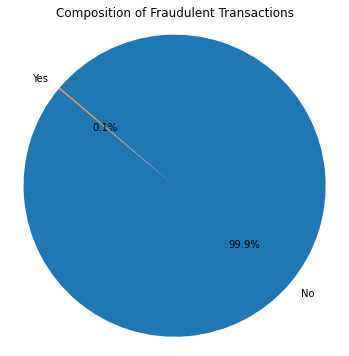

In [ ]:
# Showing percentage of fraud transactions

fraud_counts = df['Is Fraud?'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Fraudulent Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


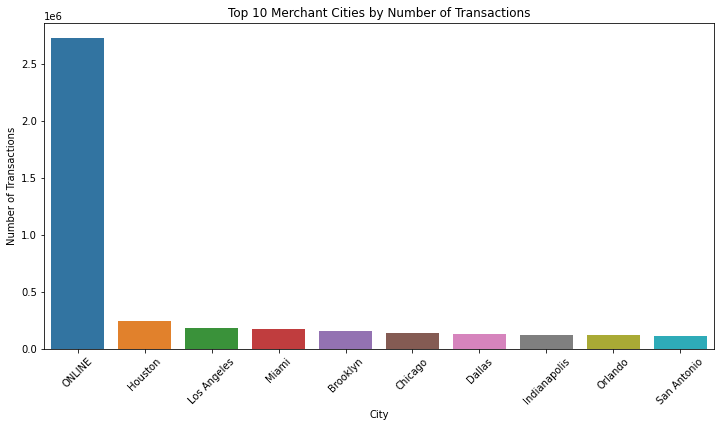

In [ ]:
# showing comparison of cities

top_cities = df['Merchant City'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Merchant Cities by Number of Transactions')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


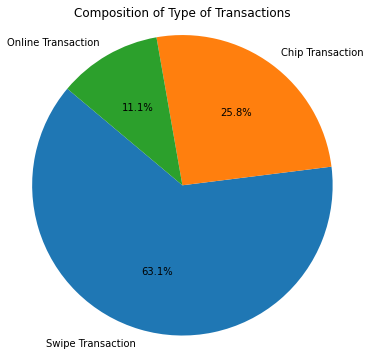

In [ ]:

# showing comparison of types of transactions

chip_counts = df['Use Chip'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(chip_counts, labels=chip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Composition of Type of Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


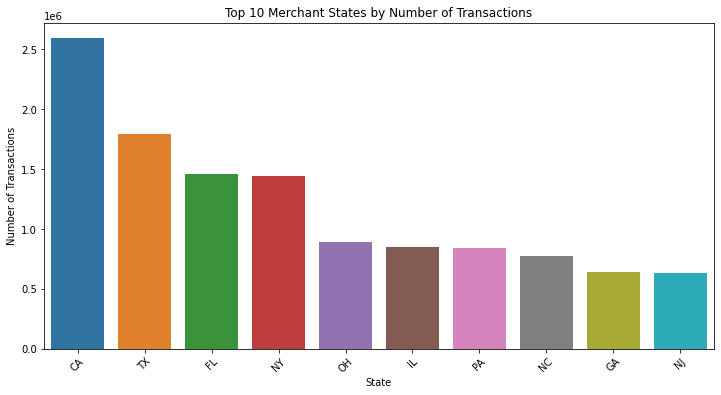

In [ ]:
# showing comparison of cities

top_states = df['Merchant State'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Merchant States by Number of Transactions')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


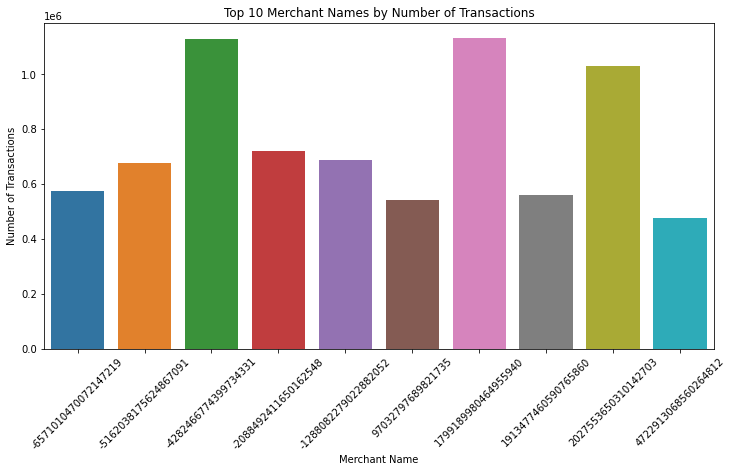

In [ ]:
# showing comparison of merchants

top_merchants = df['Merchant Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.title('Top 10 Merchant Names by Number of Transactions')
plt.xlabel('Merchant Name')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


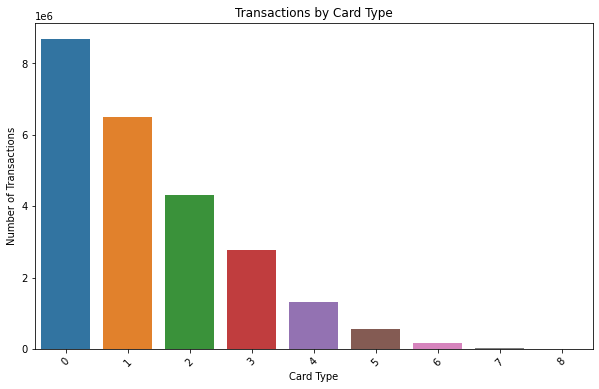

In [ ]:
# showing comparison of card types

card_counts = df['Card'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=card_counts.index, y=card_counts.values)
plt.title('Transactions by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


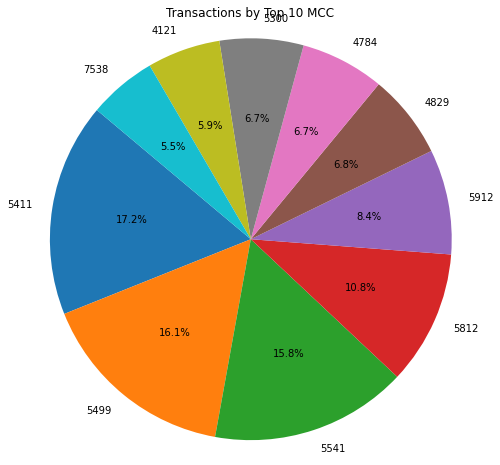

In [ ]:
# showing comparison of MCC

mcc_counts = df['MCC'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(mcc_counts.values, labels=mcc_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions by Top 10 MCC')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


Feature Transformation and Selection

In [ ]:

# Removing 'Time' and tranforming 'Amount'
from pyspark.sql.functions import *

temp = data
temp = temp.withColumn('Amount', substring('Amount', 2, 6).cast('double').alias("Amount"))

temp = temp.drop(col('Time'))
temp.show(5)

+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|   0|   0|2002|    9|  1|134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|   null|       No|
|   0|   0|2002|    9|  1| 38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|   null|       No|
|   0|   0|2002|    9|  2|128.95|Swipe Transaction|3414527459579106770|Monterey Park|            CA|91754.0|5651|   null|       No|
|   0|   0|2002|    9|  3|104.71|Swipe Transaction|5817218446178736267|     

In [ ]:

# # Counting both null and NaN values for each column
null_counts = [
    count(when(col(c).isNull() | isnan(col(c)), c)).alias(c)
    for c in temp.columns
]

# Display the count of null and NaN values for each column
temp.select(null_counts).show()


+----+----+----+-----+---+------+--------+-------------+-------------+--------------+-------+---+--------+---------+
|User|Card|Year|Month|Day|Amount|Use Chip|Merchant Name|Merchant City|Merchant State|    Zip|MCC| Errors?|Is Fraud?|
+----+----+----+-----+---+------+--------+-------------+-------------+--------------+-------+---+--------+---------+
|   0|   0|   0|    0|  0|     0|       0|            0|            0|       2720821|2878135|  0|23998469|        0|
+----+----+----+-----+---+------+--------+-------------+-------------+--------------+-------+---+--------+---------+



In [ ]:
# Remove irrelevant columns with high amount of null values

temp = temp.drop(col("Zip"))
temp = temp.drop(col("Errors?"))
temp = temp.drop(col("Merchant State"))
temp = temp.drop(col("User"))
temp = temp.drop(col("Card"))
temp = temp.drop(col("Merchant Name"))
temp.show(5)

+----+-----+---+------+-----------------+-------------+----+---------+
|Year|Month|Day|Amount|         Use Chip|Merchant City| MCC|Is Fraud?|
+----+-----+---+------+-----------------+-------------+----+---------+
|2002|    9|  1|134.09|Swipe Transaction|     La Verne|5300|       No|
|2002|    9|  1| 38.48|Swipe Transaction|Monterey Park|5411|       No|
|2002|    9|  2|120.34|Swipe Transaction|Monterey Park|5411|       No|
|2002|    9|  2|128.95|Swipe Transaction|Monterey Park|5651|       No|
|2002|    9|  3|104.71|Swipe Transaction|     La Verne|5912|       No|
+----+-----+---+------+-----------------+-------------+----+---------+
only showing top 5 rows



Feature Engineering

In [ ]:

from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

#Convert Merchant_City, Use chip and MCC columns to numeric

Merchant_City_indexer = StringIndexer(inputCol="Merchant City", outputCol="Merchant_CityIndex")

Use_Chip_indexer = StringIndexer(inputCol="Use Chip", outputCol="Use_ChipIndex")

MCC_indexer = StringIndexer(inputCol="MCC", outputCol="MCC_indexer")



#Convert Merchant_CityIndex and Use Chip Index and MCC Index
onehot_encoder = OneHotEncoder(inputCols=[ "Merchant_CityIndex", "MCC_indexer", 'Use_ChipIndex'], outputCols=[ "Merchant_City_vec", "MCC_vec", 'Use_Chip_vec'])

#Merge multiple columns into a vector column
vector_assembler = VectorAssembler(inputCols=['MCC_vec', 'Merchant_City_vec', 'Use_Chip_vec', 'Year', 'Month', 'Day', 'Amount'], outputCol='features')

# Create pipeline and pass it to stages
pipeline = Pipeline(stages=[
           MCC_indexer,
           Use_Chip_indexer,
           Merchant_City_indexer,
           onehot_encoder,
           vector_assembler
])

# fit and transform

temp_transformed = pipeline.fit(temp).transform(temp)
temp_transformed.show()

+----+-----+---+------+------------------+-------------+----+---------+-----------+-------------+------------------+-------------------+----------------+-------------+--------------------+
|Year|Month|Day|Amount|          Use Chip|Merchant City| MCC|Is Fraud?|MCC_indexer|Use_ChipIndex|Merchant_CityIndex|  Merchant_City_vec|         MCC_vec| Use_Chip_vec|            features|
+----+-----+---+------+------------------+-------------+----+---------+-----------+-------------+------------------+-------------------+----------------+-------------+--------------------+
|2002|    9|  1|134.09| Swipe Transaction|     La Verne|5300|       No|        7.0|          0.0|             517.0|(13428,[517],[1.0])| (108,[7],[1.0])|(2,[0],[1.0])|(13542,[7,625,135...|
|2002|    9|  1| 38.48| Swipe Transaction|Monterey Park|5411|       No|        0.0|          0.0|             746.0|(13428,[746],[1.0])| (108,[0],[1.0])|(2,[0],[1.0])|(13542,[0,854,135...|
|2002|    9|  2|120.34| Swipe Transaction|Monterey Park

In [ ]:
# Encoding Target Variable

trf_data =  temp_transformed.select('features', 'Is Fraud?')

from pyspark.sql.functions import when

trf_data = trf_data.withColumn('Is Fraud?', when(trf_data['Is Fraud?']=='No', 0).otherwise(1))

trf_data.show(5)

+--------------------+---------+
|            features|Is Fraud?|
+--------------------+---------+
|(13543,[7,625,135...|        0|
|(13543,[0,854,135...|        0|
|(13543,[0,854,135...|        0|
|(13543,[25,854,13...|        0|
|(13543,[4,625,135...|        0|
+--------------------+---------+
only showing top 5 rows



In [ ]:
# Scaling Features using StandardScaler

from pyspark.ml.feature import StandardScaler

std_scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
trf_data = std_scaler.fit(trf_data).transform(trf_data)

trf_data.show(5)

+--------------------+---------+--------------------+
|            features|Is Fraud?|     scaled_features|
+--------------------+---------+--------------------+
|(13543,[7,625,135...|        0|(13543,[7,625,135...|
|(13543,[0,854,135...|        0|(13543,[0,854,135...|
|(13543,[0,854,135...|        0|(13543,[0,854,135...|
|(13543,[25,854,13...|        0|(13543,[25,854,13...|
|(13543,[4,625,135...|        0|(13543,[4,625,135...|
+--------------------+---------+--------------------+
only showing top 5 rows



In [ ]:
# spliting transformed data into training and testing set

train, test = trf_data.randomSplit([0.7,0.3])
train.show(5)
test.show(5)

+--------------------+---------+--------------------+
|            features|Is Fraud?|     scaled_features|
+--------------------+---------+--------------------+
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
+--------------------+---------+--------------------+
only showing top 5 rows

+--------------------+---------+--------------------+
|            features|Is Fraud?|     scaled_features|
+--------------------+---------+--------------------+
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
|(13543,[0,109,135...|        0|(13543,[0,109,135...|
+--------------------+---------+--------------------+
onl

Model Training and Evaluation

In [ ]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LinearSVC

from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

Logistic Regression

In [ ]:
# Training and Prediction using Logistic Regression

logReg = LogisticRegression(labelCol='Is Fraud?', featuresCol='scaled_features', maxIter=40)
logreg = logReg.fit(train)
y_pred_log = logreg.transform(test)
y_pred_log.select('Is Fraud?', 'prediction').show(5)


+---------+----------+
|Is Fraud?|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 5 rows



In [ ]:
# Calculating Accuracy, Precision, Recall and F1 Score

evaluator = MulticlassClassificationEvaluator(labelCol='Is Fraud?', predictionCol='prediction', metricName='accuracy')
logreg_accuracy = evaluator.evaluate(y_pred_log)

evaluator.setMetricName("weightedPrecision")
logreg_w_precision = evaluator.evaluate(y_pred_log)

evaluator.setMetricName("weightedRecall")
logreg_w_recall = evaluator.evaluate(y_pred_log)

evaluator.setMetricName("f1")
logreg_f1 = evaluator.evaluate(y_pred_log)

print(f'Logistic Regression Evaluation Results:\n'
      f'  Accuracy:          {logreg_accuracy:.4f}\n'
      f'  Weighted Precision:{logreg_w_precision:.4f}\n'
      f'  Weighted Recall:   {logreg_w_recall:.4f}\n'
      f'  F1 Score:          {logreg_f1:.4f}\n')


Logistic Regression Evaluation Results:
  Accuracy:          0.9992
  Weighted Precision:0.9991
  Weighted Recall:   0.9992
  F1 Score:   0.9990



In [ ]:
# Showing Confusion Matrix

from pyspark.sql.types import FloatType
import pandas as pd

predictionAndLabels_log = y_pred_log.select(['Is Fraud?', 'prediction']).withColumn('Is Fraud?', col('Is Fraud?').cast(FloatType()))
predictionAndLabels_log = predictionAndLabels_log.rdd.map(tuple)

metrics = MulticlassMetrics(predictionAndLabels_log)
conf_mat_log = metrics.confusionMatrix().toArray()

conf_mat_log = pd.DataFrame(conf_mat_log.astype('int'))
conf_mat_log


,0,1
0,7305054,5432
1,706,3572


In [ ]:
import plotly.express as px

fig = px.imshow(conf_mat_log, title = 'Confusion Matrix of Logistic Regression', text_auto=True,
                labels=dict(x="Is Fraud? (Predicted)", y="Is Fraud? (Actual)"),
                   color_continuous_scale='Viridis')
fig.update_layout(title_x=0.5)

fig.show()

In [ ]:
log_reg_dict = [{'Accuracy': logreg_accuracy, 'Precision': logreg_w_precision, 'Recall': logreg_w_recall, 'F1 Score': logreg_f1}]
log_reg_dict

results_df = pd.DataFrame(log_reg_dict)
results_df

,Accuracy,Precision,Recall,F1 Score
0,0.999161,0.999055,0.999161,0.999012


Support Vector Classifier

In [ ]:
# Training and Prediction using Support Vector Classifier

svc = LinearSVC(labelCol='Is Fraud?', featuresCol='scaled_features', maxIter=50, regParam=0.5, tol=1e-5)
svc = svc.fit(train)
y_pred_svc = svc.transform(test)
y_pred_svc.select('Is Fraud?', 'prediction').show(5)


+---------+----------+
|Is Fraud?|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 5 rows



In [ ]:
# Calculating Accuracy, Precision, Recall and F1 Score

evaluator = MulticlassClassificationEvaluator(labelCol='Is Fraud?', predictionCol='prediction', metricName='accuracy')
svc_accuracy = evaluator.evaluate(y_pred_svc)

evaluator.setMetricName("weightedPrecision")
svc_w_precision = evaluator.evaluate(y_pred_svc)

evaluator.setMetricName("weightedRecall")
svc_w_recall = evaluator.evaluate(y_pred_svc)

evaluator.setMetricName("f1")
svc_f1 = evaluator.evaluate(y_pred_svc)

print(f'Support Vector Classifier Evaluation Results:\n'
      f'  Accuracy:          {svc_accuracy:.4f}\n'
      f'  Weighted Precision:{svc_w_precision:.4f}\n'
      f'  Weighted Recall:   {svc_w_recall:.4f}\n'
      f'  F1 Score:          {svc_f1:.4f}\n')


Support Vector Classifier Evaluation Results:
  Accuracy:          0.9988
  Weighted Precision:0.9987
  Weighted Recall:   0.9988
  F1 Score:   0.9983



In [ ]:
# Showing Confusion Matrix

predictionAndLabels_svc = y_pred_svc.select(['Is Fraud?', 'prediction']).withColumn('Is Fraud?', col('Is Fraud?').cast(FloatType()))
predictionAndLabels_svc = predictionAndLabels_svc.rdd.map(tuple)

metrics = MulticlassMetrics(predictionAndLabels_svc)
conf_mat_svc = metrics.confusionMatrix().toArray()

conf_mat_svc = pd.DataFrame(conf_mat_svc.astype('int'))
conf_mat_svc


/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning:

Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.



,0,1
0,7305720,8643
1,40,361


In [ ]:
svc_dict = [{'Accuracy': svc_accuracy, 'Precision': svc_w_precision, 'Recall': svc_w_recall, 'F1 Score': svc_f1}]
svc_dict

results_df = pd.concat([results_df, pd.DataFrame(svc_dict)], axis=0)
results_df

,Accuracy,Precision,Recall,F1 Score
0,0.999161,0.999055,0.999161,0.999012
0,0.998813,0.998697,0.998813,0.998270


In [ ]:
svc_dict = [{'Accuracy': svc_accuracy, 'Precision': svc_w_precision, 'Recall': svc_w_recall, 'F1 Score': svc_f1}]
svc_dict

results_df = pd.concat([results_df, pd.DataFrame(svc_dict)], axis=0)

results_df.index = ['Logistic Regression', 'Support Vector Classifier']
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.999161,0.999055,0.999161,0.999012
Support Vector Classifier,0.998813,0.998697,0.998813,0.998270


In [ ]:
import plotly.express as px

fig = px.imshow(conf_mat_svc, title = 'Confusion Matrix of Support Vector Classifier', text_auto=True,
                labels=dict(x="Is Fraud? (Predicted)", y="Is Fraud? (Actual)"),
                   color_continuous_scale='Viridis')
fig.update_layout(title_x=0.5)

fig.show()

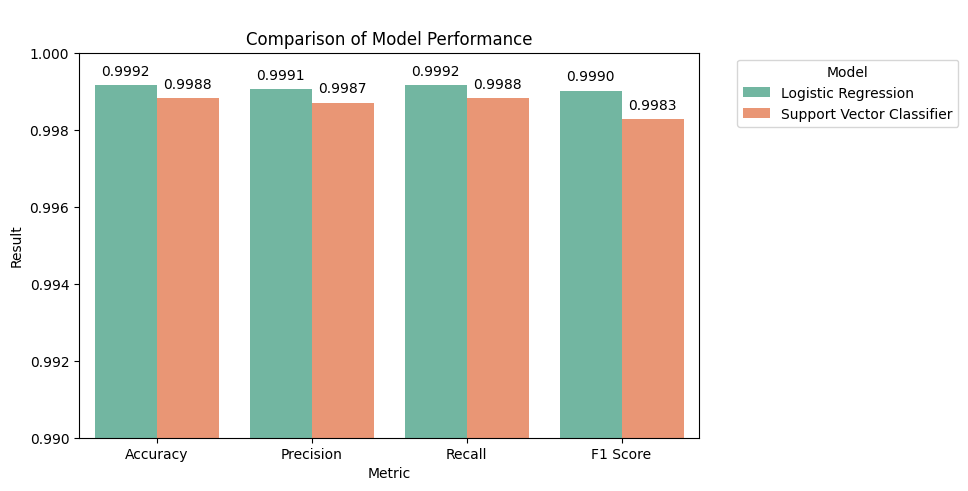

In [ ]:

import warnings
warnings.filterwarnings('ignore')


# Comparing Logistic Regression and Support Vector Classifier

results_df = results_df.T
results_df['Metric'] = results_df.index
results_df = results_df.reset_index(drop=True)
results_df = pd.melt(results_df, id_vars=['Metric'], value_vars=['Logistic Regression', 'Support Vector Classifier'])
results_df.columns = ['Metric', 'Model', 'Result']

# Set a visually appealing color palette
colors = sns.color_palette("Set2")

plt.figure(figsize=(8,5))

# Plotting with error bars to show confidence interval
g = sns.barplot(data=results_df, x="Metric", y="Result", hue="Model", ci="sd", palette=colors)
plt.title('\nComparison of Model Performance')
plt.ylim(0.99, 1.0)

# Add annotations for each bar
for p in g.patches:
    g.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Model')

plt.show()